s23704, ZUM3

In [ ]:
from keras.datasets import cifar10 as dataset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

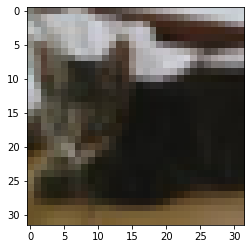

In [ ]:
plt.imshow(X_train[9])

[[[125 125 116]
  [110 101  91]
  [102  90  83]
  [106  97  94]
  [106  99  96]
  [141 135 131]
  [175 170 166]
  [175 169 165]
  [148 141 136]
  [106  88  83]
  [ 74  54  49]
  [ 71  56  49]
  [ 73  61  53]
  [ 80  70  63]
  [ 96  83  77]
  [110  98  92]]

 [[142 146 142]
  [146 144 139]
  [176 172 170]
  [193 190 190]
  [187 191 195]
  [188 195 201]
  [187 194 200]
  [179 186 191]
  [187 193 197]
  [183 181 182]
  [149 143 144]
  [134 126 126]
  [118 108 108]
  [ 88  77  75]
  [ 67  53  44]
  [ 71  54  44]]

 [[180 185 183]
  [143 146 146]
  [156 157 157]
  [186 185 185]
  [193 194 195]
  [185 187 189]
  [191 193 195]
  [177 180 182]
  [176 179 181]
  [197 201 206]
  [206 208 214]
  [179 178 182]
  [169 163 166]
  [175 167 168]
  [150 144 141]
  [156 149 148]]

 [[197 198 196]
  [177 182 183]
  [149 153 152]
  [168 167 162]
  [182 180 177]
  [189 188 186]
  [197 196 194]
  [188 186 184]
  [179 178 178]
  [196 198 207]
  [202 204 214]
  [194 193 199]
  [173 171 173]
  [171 168 167]
  

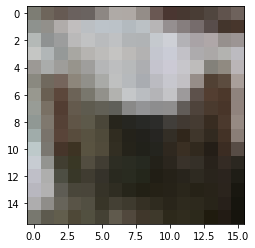

In [ ]:
image_slice = X_train[9][0:16,0:16]
print(image_slice)
plt.imshow(image_slice)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


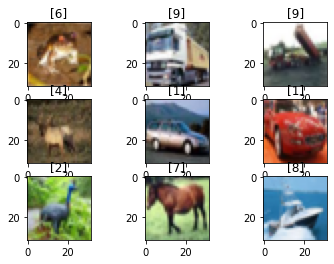

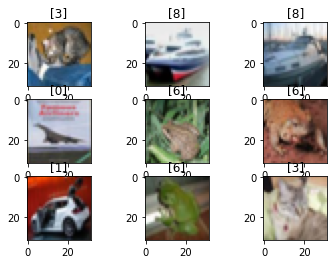

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
plt.show()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(y_test[i])
  plt.imshow(X_test[i])
plt.show()

Klasyfikacja SVM

In [ ]:
train_count = 10000
X_train = X_train[0:train_count]
y_train = y_train[0:train_count]

np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1005,  974, 1032, 1016,  999,  937, 1030, 1001, 1025,  981]))

In [ ]:
X_train.shape

(10000, 32, 32, 3)

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='poly', gamma=0.1)

In [ ]:
#classifier.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]), y_train)

In [ ]:
#y_pred = classifier.predict(X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))

In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix
#print(accuracy_score(y_pred, y_test))
#print(confusion_matrix(y_pred, y_test))

Klasyfikacja CNN

Ponowne wczytanie danych

In [ ]:
from keras.datasets import cifar10 as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [ ]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][0][0]))

X_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Normalizacja

Sieć będzie szybciej uczyła się na danych o wartościach w przedziale 0-1 niż 0-255, dlatego poddaję je normalizacji.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Zmieniam tablice na 32-biotwe float-y ponieważ Keras korzysta domyślnie z takiej konfiguracji i a 64-bitowe tablice będą problematyczne.


In [ ]:
print(type(X_train[0][0][0][0]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(type(X_train[0][0][0][0]))

<class 'numpy.float64'>
<class 'numpy.float32'>


Przygotowane zostały dane treningowe. 
Na podstawie wyniku ostatnich neuronów należy podjąć decyzję do której klasy przypiszemy dane zdjęcie. W tym celu potrzebujemy etykiety, które są na tę chwilę wektorami liczb - przerabiamy je do postaci one-hot.

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else: 
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

Przygotowanie sieci

In [ ]:
Y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Pierwszy model sieci

(2 warstwy konwolucyjne i 2 max pooling - zmniejszenie obrazka dwukrotnie)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model1 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape), 
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), 
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Trening 

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 45s 227ms/step - loss: 1.4086 - accuracy: 0.5010
Epoch 2/20
196/196 [==============================] - 44s 226ms/step - loss: 1.2790 - accuracy: 0.5490
Epoch 3/20
196/196 [==============================] - 45s 228ms/step - loss: 1.1984 - accuracy: 0.5807
Epoch 4/20
196/196 [==============================] - 45s 227ms/step - loss: 1.1243 - accuracy: 0.6054
Epoch 5/20
196/196 [==============================] - 44s 226ms/step - loss: 1.0714 - accuracy: 0.6271
Epoch 6/20
196/196 [==============================] - 45s 228ms/step - loss: 1.0227 - accuracy: 0.6437
Epoch 7/20
196/196 [==============================] - 44s 226ms/step - loss: 0.9833 - accuracy: 0.6594
Epoch 8/20
196/196 [==============================] - 44s 223ms/step - loss: 0.9408 - accuracy: 0.6757
Epoch 9/20
196/196 [==============================] - 44s 226ms/step - loss: 0.9060 - accuracy: 0.6876
Epoch 10/20
196/196 [==============================] - 44s 226ms/step - l

Ewaluacja

In [ ]:
scores = model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9574 - accuracy: 0.6811


In [ ]:
print(scores[1])

0.6811000108718872


In [ ]:
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis=1) 
print(y_pred[:20])
print(y_test[:20].T)

[3 1 8 0 6 6 1 6 3 1 4 9 5 7 9 8 5 3 8 6]
[[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]]


In [ ]:

false_pred = np.nonzero(y_pred != y_test)[1]
print(false_pred[0:10])

[ 1  2  3  4  5  6  7  9 10 11]


Sprawdzenie gdzie sieć sobie nie poradziła

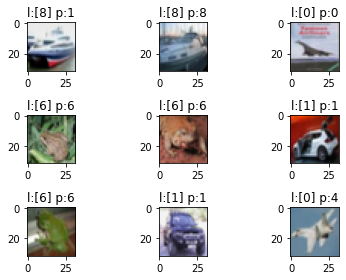

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
  instance_index = false_pred[i] 
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(32, 32, 3))
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))

CNN + early stopping i zbiór walidacyjny

In [ ]:
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10 as dataset
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()
X_train = X_train / 255.0 #jeszcze raz normalizacja z 0-255 do 0-1
X_test = X_test / 255.0

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

Dodawanie Early stopping

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model_es = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), 
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    mode="auto",
)

Wydzielenie zbioru walidacyjnego i zwiększenie liczby epok w celu weryfikacji działania early stopping

In [ ]:
model_es.fit(X_train, Y_train, epochs=30, batch_size=256,validation_split=0.1, callbacks = [es])

Epoch 1/30
176/176 [==============================] - 42s 235ms/step - loss: 1.7065 - accuracy: 0.3870 - val_loss: 1.4607 - val_accuracy: 0.4782
Epoch 2/30
176/176 [==============================] - 42s 237ms/step - loss: 1.3733 - accuracy: 0.5154 - val_loss: 1.3067 - val_accuracy: 0.5396
Epoch 3/30
176/176 [==============================] - 42s 237ms/step - loss: 1.2440 - accuracy: 0.5635 - val_loss: 1.1872 - val_accuracy: 0.5884
Epoch 4/30
176/176 [==============================] - 42s 237ms/step - loss: 1.1582 - accuracy: 0.5939 - val_loss: 1.1210 - val_accuracy: 0.6106
Epoch 5/30
176/176 [==============================] - 42s 237ms/step - loss: 1.0962 - accuracy: 0.6186 - val_loss: 1.0788 - val_accuracy: 0.6288
Epoch 6/30
176/176 [==============================] - 42s 240ms/step - loss: 1.0471 - accuracy: 0.6348 - val_loss: 1.0337 - val_accuracy: 0.6452
Epoch 7/30
176/176 [==============================] - 42s 239ms/step - loss: 0.9989 - accuracy: 0.6533 - val_loss: 1.0076 - val_ac

In [ ]:
scores = model_es.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9687 - accuracy: 0.6657


Model_es + funkcja dropout

In [ ]:
from keras.layers import Dropout
model_es_drop = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Dropout(.2),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), 
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_es_drop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    mode="auto",
)

In [ ]:
model_es_drop.fit(X_train, Y_train, epochs=30, batch_size=256,validation_split=0.1, callbacks = [es]) #więcej epok

Epoch 1/30
176/176 [==============================] - 46s 256ms/step - loss: 1.7855 - accuracy: 0.3563 - val_loss: 1.5534 - val_accuracy: 0.4516
Epoch 2/30
176/176 [==============================] - 46s 259ms/step - loss: 1.4369 - accuracy: 0.4887 - val_loss: 1.3423 - val_accuracy: 0.5282
Epoch 3/30
176/176 [==============================] - 45s 253ms/step - loss: 1.3054 - accuracy: 0.5380 - val_loss: 1.2412 - val_accuracy: 0.5636
Epoch 4/30
176/176 [==============================] - 44s 252ms/step - loss: 1.2222 - accuracy: 0.5686 - val_loss: 1.1752 - val_accuracy: 0.5892
Epoch 5/30
176/176 [==============================] - 45s 254ms/step - loss: 1.1515 - accuracy: 0.5985 - val_loss: 1.1011 - val_accuracy: 0.6248
Epoch 6/30
176/176 [==============================] - 45s 253ms/step - loss: 1.0938 - accuracy: 0.6162 - val_loss: 1.0663 - val_accuracy: 0.6286
Epoch 7/30
176/176 [==============================] - 45s 255ms/step - loss: 1.0502 - accuracy: 0.6321 - val_loss: 1.0388 - val_ac

In [ ]:
scores = model_es_drop.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9136 - accuracy: 0.7017


Brak dropoutu, ale z wieksza ilośść warstw konwolucyjnych

In [ ]:
model_es_MORECONV = Sequential([
  Conv2D(32, kernel_size=(3, 3), padding= "same", activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), padding="same", activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), 
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_es_MORECONV.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    mode="auto",
)

In [ ]:
model_es_MORECONV.fit(X_train, Y_train, epochs=40, batch_size=256,validation_split=0.1, callbacks = [es]) #jeszcze troszkę więcej epok

Epoch 1/40
176/176 [==============================] - 122s 693ms/step - loss: 1.6427 - accuracy: 0.4081 - val_loss: 1.3681 - val_accuracy: 0.5116
Epoch 2/40
176/176 [==============================] - 123s 697ms/step - loss: 1.2896 - accuracy: 0.5388 - val_loss: 1.1799 - val_accuracy: 0.5824
Epoch 3/40
176/176 [==============================] - 122s 692ms/step - loss: 1.1217 - accuracy: 0.6038 - val_loss: 1.0422 - val_accuracy: 0.6376
Epoch 4/40
176/176 [==============================] - 122s 691ms/step - loss: 1.0242 - accuracy: 0.6381 - val_loss: 1.0084 - val_accuracy: 0.6504
Epoch 5/40
176/176 [==============================] - 122s 694ms/step - loss: 0.9373 - accuracy: 0.6726 - val_loss: 0.9214 - val_accuracy: 0.6778
Epoch 6/40
176/176 [==============================] - 122s 693ms/step - loss: 0.8607 - accuracy: 0.6970 - val_loss: 0.8816 - val_accuracy: 0.7044
Epoch 7/40
176/176 [==============================] - 122s 694ms/step - loss: 0.7972 - accuracy: 0.7202 - val_loss: 0.8838 -